## Assignment 3: Linear Regression
In this assignment, I will use data from Mashable (www.mashable.com). Mashable is an online magazine that focuses on producing viral content. You may wonder: what makes an article go viral? That’s what you will be trying to find out!

The data comes from a study by Fernandes, Vinagre and Cortez (2015). The data set consists of over 30,000 articles with associated variables such as the title length, the article category and the weekday on which it was published. For simplicity, some variables have been deleted from the original data file, which can be found on Kaggle (a platform for machine learning).

### How linear regression works:

Linear Regression is the process of finding a line that best fits the data points available on the plot, so that we can use it to predict output values for inputs that are not present in the data set we have, with the belief that those outputs would fall on the line. assumes a relationship between the input variables (x) and the single output variable (y).

In [117]:
from scipy.stats.stats import pearsonr 
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
df = pd.read_csv('mashable.csv')
df = df.dropna() #Let's get rid of rows with empty cells, because they will trip up a lot of the analyses
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


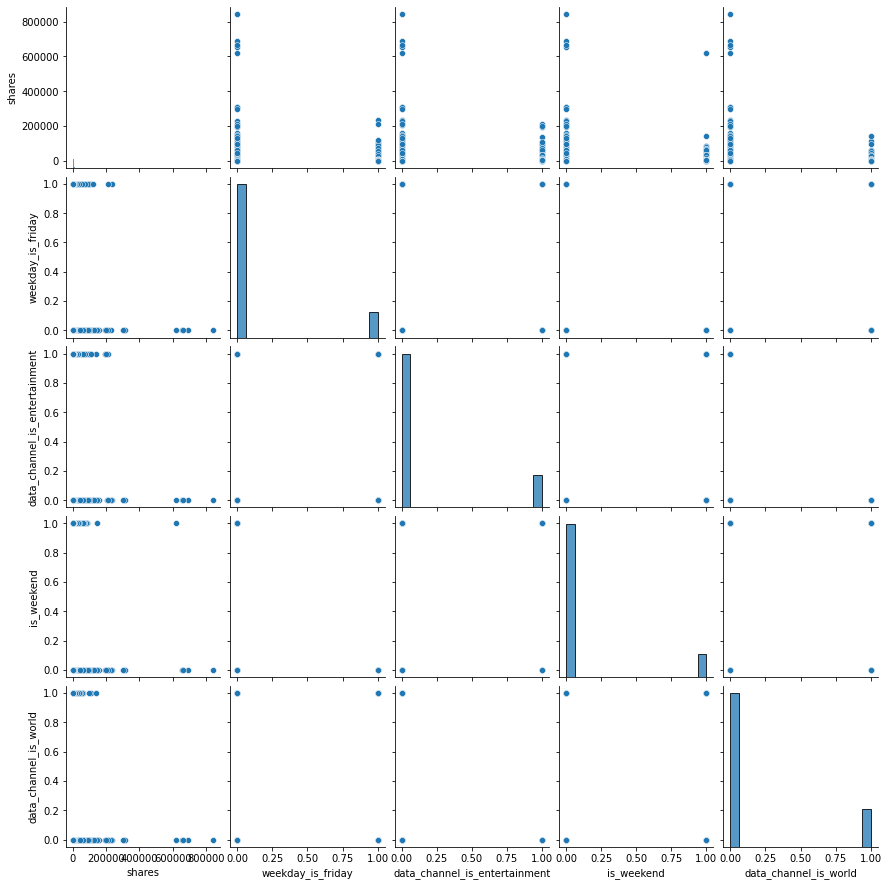

In [50]:
variables = df[["shares", "weekday_is_friday", "data_channel_is_entertainment", "is_weekend", "data_channel_is_world"]] #make selection
sns.pairplot(variables)#create scatterplot matrix
plt.show()

In [18]:
df.corr()


,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


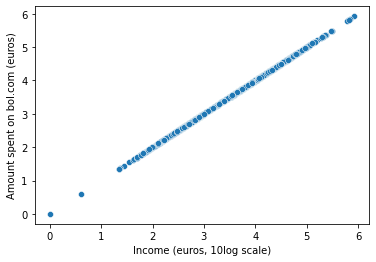

In [32]:
df['is_weekend']= df['shares'].apply(math.log10) #creates a variable with income on 10log scale
sns.scatterplot(x='shares_log', y='is_weekend', data=df)
plt.ylabel("Amount spent on bol.com (euros)")
plt.xlabel("Income (euros, 10log scale)")
plt.show()

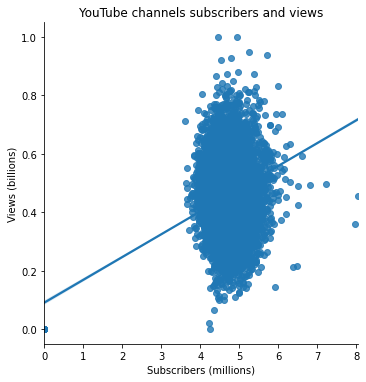

In [40]:
sns.lmplot(x='average_token_length', y='global_subjectivity', data=df)
plt.title('YouTube channels subscribers and views')
plt.xlabel("Subscribers (millions)")
plt.ylabel("Views (billions)")
plt.show()

In [109]:
y = df['shares_log'] #We need to take out the rating as our Y-variable
X = df[["is_weekend", "data_channel_is_world" ,"data_channel_is_entertainment","n_tokens_title","global_subjectivity"]] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['url'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,is_weekend,data_channel_is_world,data_channel_is_entertainment,n_tokens_title,global_subjectivity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0,0,0,10,0.439379
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0,1,0,9,0.300454
http://mashable.com/2013/02/01/hello-kitty-rocket/,0,0,0,11,0.575486
http://mashable.com/2014/02/06/add-us-on-snapchat/,0,0,0,8,0.327220
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0,0,0,9,0.507709


In [110]:

#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,is_weekend,data_channel_is_world,data_channel_is_entertainment,n_tokens_title,global_subjectivity
url,,,,,
http://mashable.com/2013/05/29/nasdaq-facebook-ipo/,0,0,0,10,0.356667
http://mashable.com/2013/06/14/sonic-fabric-tapes/,0,0,1,10,0.354047
http://mashable.com/2013/05/13/wikipedia-edits-live-map/,0,1,0,11,0.524074
http://mashable.com/2014/04/08/twitters-new-profiles-what-you-need-to-know/,0,1,0,12,0.467244
http://mashable.com/2014/09/17/craft-cocktail-recipes/,0,0,0,12,0.547241


In [111]:

lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [112]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.130022,is_weekend
-0.160949,data_channel_is_world
-0.128153,data_channel_is_entertainment
0.002438,n_tokens_title
0.235527,global_subjectivity


In [113]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.0448508950233405

In [114]:
math.sqrt(mean_squared_error(y_test, y_test_p))


0.39731525482800045

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


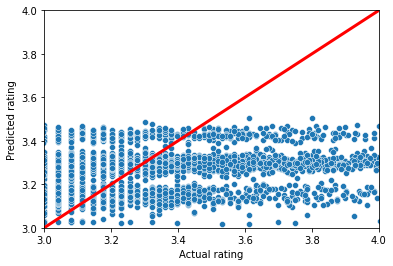

In [116]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([3,4]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,4])
plt.plot([3, 4], [3, 4], color='red', lw=3) #Plot a diagonal length
plt.show()